In [2]:
from PIL import Image
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Table of Contents
* [Основные понятия статистики](#main-statistics)
* [Виды распределений](#distributions)
* [Про двусторонее, левосторонее и правосторонее p-value](#p-value-sides)
* [Доверительные интервалы](#confident-intervals)
* [Критерий Колмогорова Смирнова (сравнение двух выборок или проверка принадлежности к какому-то распределению)](#kolmogorov-smirnov)
* [Критерии проверки на нормальность](#normal-test)
* [Функция для определение вида распределения](#func-kind-distr)
* [Точный критерий фишера](#fisher-exact)
* [Хи квадрат Пирсена и критерий согласия хи квадрат](#chi2)
* [Коэффициент корреляции Пирсона ](#pearson)
* [Коэффициент корреляции Спирмена / Кендалла ](#spearman-kendaal)
* [Т критерий стьюдента и Уэлча ](#t-student)
* [U критерий Манна Уитни ](#manna-uitni)
* [ANOVA](#anova)
* [Критерий Краскела-Уоллиса (H-критерий) ](#kruskal)
* [Тест Тьюки](#pairwise-tukeyhsd)


![](statistics_scheme_chose_method.jpg)

# Основные понятия статистики <a class="anchor" id="main-statistics"></a>

Для чего аналитику нужна статистика
- проводить АБ тесты и эксперименты
- исследовать и визуализироватьданные (при аггрегации данных мы используем средние, медианы и прочее)
- правильно  использовать метрики (продуктовые, экономический и прочие), так как по сути при их расчетах используются и средние и другие статистики
- делать выводы на основе вероятностей, так как мы работаем с выборками, и чтобы их сранвивать наму нужно использовтаь статистический аппарат

Для чего используется выборка
- Для того, чтобы не нарушить бизнес процессы, если наша гипотеза будет неверной и мы сделаем плохо большому количеству наших пользователй и они могут уйти
- Потому что просто сложно и дорого проводить исследования на всех пользователях
- И в большинстве случаев мы не имеем всей генеральной совокупности

В статистике термины "статистика" и "параметр" используются для обозначения различных понятий.
- Статистика — это числовая характеристика, вычисленная на основе выборки. Например, среднее значение, медиана, дисперсия и другие показатели, рассчитанные на основе данных, собранных из выборки, являются статистиками. Они используются для описания свойств выборки и могут служить оценками для параметров генеральной совокупности.
- Параметр — это числовая характеристика, описывающая всю генеральную совокупность. Например, истинное среднее значение или дисперсия всей популяции.


Скошенность проще запомнить так - скошенность это где тянеться хвост.  
Если слева хвост тянеться дальше чем справа, то это левая скошенность.  
Иначе правая.   
Правая это положительная, так как хвост тянеться в сторону положительных значений.  
Левая это отрицательная, так как хвост тянеться в сторону отрицательных значений.

Важно понимать, что для бизнеса среднее более важно, чем медиана.  
Так как среднее реагирует на дорогие покупки, а медиана нет.  
Таким образом медиана покажет меньшее значение, чем среднее.  
Это полезно для анализа, чтобы проанализировать поведение без выбросов (так как выбросов может и не быть в какой-то момент времени).  
Но для оценки сколько денег мы получаем среднее лучше подходит, так как оно учитывает все значения, а не только их порядок.  

Важно помнить про ранговые переменные, это что-то среднее между количественными и качественными.  
Ранговые переменные отличаются от количественных тем, что они не имеют единиц измерения.
Также у ранговых переменных нельзя с уверенностью с казать что разность между 1 и 2 например такая же как между 3 и 4.  
И также ещё одно отличие качественных переменных, что в большинстве случаев их нельзя складывать и вычитать.

Задача статистики для аналитика это определить случайно ли получены различия или они статистически значимы.  
Пример с монеткой, если мы подбросим монетук 100 раз, то выпадет одно количество орлов, а если подбросим второй раз,  
то выпадет немного другое количество орлов. И это связано с тем, что большинство явлений в мире имеют фактор случайности.  
И когда мы имеем дело с выборкамм, то у нас присутствует вот этот фактор случайности, и статистика помогает определить статистически значимы ли различия или это все таки просто случайно полученные различия.

Почему мы нулевую гипотезу формируем как отсутствие различий.  
Тут дело в том, что мы сначала формируем гипотезу, что нет отличий, а потом определяем какая вероятность получить такие или более выраженные отличия.  
И исходя из полученного p-value и уровня значимости определяем есть ли основания отвергнуть нулевую гипотезу или полученные различия случайны.

# Виды распределений <a class="anchor" id="distributions"></a>

https://habr.com/ru/articles/311092/

Равномерное

Матожиданине равно $\frac{a + b}{2}$  
Диспресия равна $\frac{(b - a)^2}{12}$

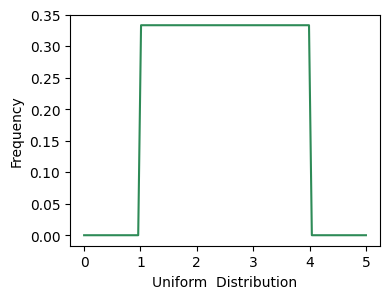

In [66]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
x = np.linspace(0, 5, 100)
pdf = sps.uniform(a, b-a).pdf(x)
ax = sns.lineplot(x=x, y=pdf, color='seagreen')
ax.set(xlabel='Uniform  Distribution', ylabel='Frequency')
plt.gcf().set_size_inches(4, 3)

Нормальное

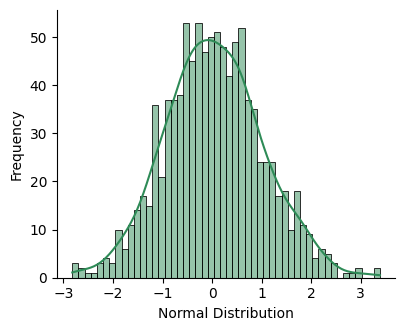

In [56]:
# generate data
data =sps.norm(scale=1, loc=0).rvs(1000)
 
# plotting a histogram
ax = sns.displot(data,
                  bins=50,
                  kde=True,
                  color='seagreen')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.gcf().set_size_inches(4, 3)

Биномиальное

Матожиданине равно np  
Диспресия равна npq

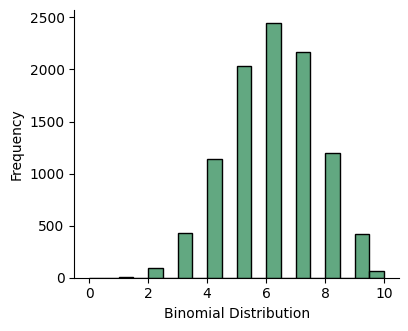

In [58]:
# generate data
# n== number of trials,p== probability of each trial
n, p = 10, 0.6
data = sps.binom(n, p).rvs(10000)
 
# plotting a histogram
ax = sns.displot(data,
                  bins=20,
                  kde=False,
                  color='seagreen')
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')
plt.gcf().set_size_inches(4, 3)

Пуассона

Распределение Пуассона - это частный случай биномиального распределения при n >> 0 и p -> 0  
Распределение Пуассона - это распределение числа появления редких событий, которые могут принимать только 2 противоположных события,  
Это распределение возникает, когда вероятнсоть появления одного из признаков мала, число испытаний n большое.  
Если известна вероятнсоть успеха в каждом испытании, то вероятность того, что в n независимых испытаниях  
событие наступит k раз, равно



$$P_{n}(k) = \frac{\lambda^k}{k!}e^{-\lambda}$$

$\lambda$ - параметр распределения  
$\lambda = np$, k = 0, 1, 2, 3, ...

Матожидвание и диспресия равны $\lambda$



Распределение Пуассона значительно отличается от рассмотренных выше распределений своей «предметной» областью:   
теперь рассматривается не вероятность наступления того или иного исхода испытания,   
а интенсивность событий, то есть среднее количество событий в единицу времени.

Распределение Пуассона описывает вероятность наступления k независимых событий за время t при средней интенсивности событий $\lambda$

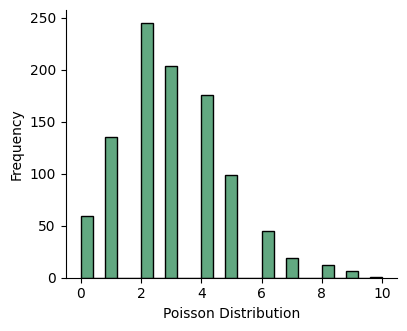

In [59]:
#generate random values from Poisson distribution with mean=3 and sample size=10
poisson_data = sps.poisson(mu=3).rvs(1000)
 
# plotting a histogram
ax = sns.displot(poisson_data,
                  kde=False,
                  color='seagreen')
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')
plt.gcf().set_size_inches(4, 3)

Логнормальное

Логнормальное распределение задается плотностью вероятности, имеющей вид:
$$p(x)=\frac{1}{\sigma x\sqrt{2\pi }}e^{-\frac{(ln(x)-\mu )^{2}}{2\sigma^{2}}}$$

где $\mu$ это среднее значение, а $\sigma$ стандартное отклонение нормального распределения логарифма. 

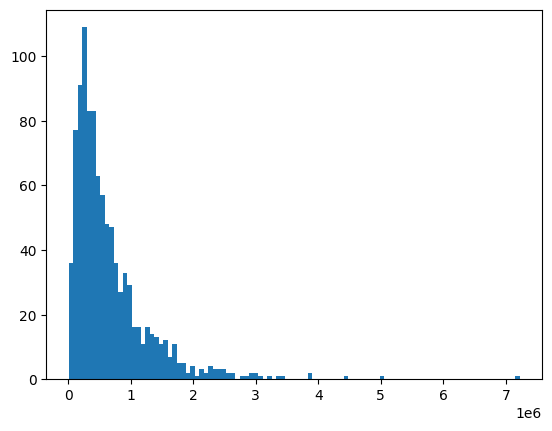

In [17]:
mu, sigma = 13., 0.9 # среднее значение и отклонение
s = np.random.lognormal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100)
plt.show()

You have the mode and the standard deviation of the log-normal distribution.   
To use the rvs() method of scipy's lognorm, you have to parameterize the distribution   
in terms of the shape parameter s, which is the standard deviation sigma of the underlying normal distribution,   
and the scale, which is exp(mu), where mu is the mean of the underlying distribution.  

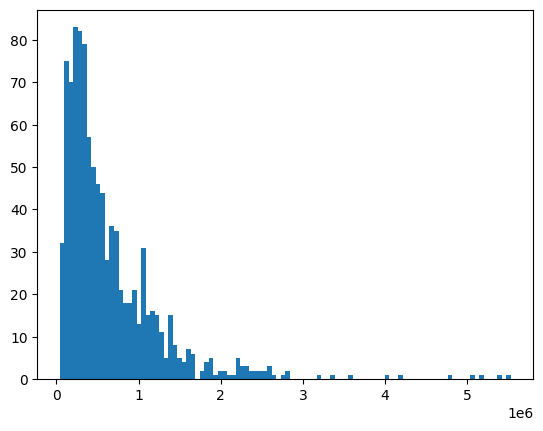

In [18]:
mu, sigma = 13., 0.9 # среднее значение и отклонение
s = sps.lognorm(s = sigma, scale=np.exp(mu)).rvs(1000)
count, bins, ignored = plt.hist(s, bins = 100)

Гамма распределение

Гамма-распределение является обобщением рапсределения хи-квадрат и, соответственно, экспоненциального распределения.   
Суммы квадратов нормально распределённых величин, а также суммы величин распределённых по хи-квадрат   
и по экспоненциальному распределению будут иметь гамма-распределение.

Параметры Гамма закона k и theta связаны со средним и дисперсией этого закона следующим образом (https://ru.wikipedia.org/wiki/Гамма-распределение):

$$m(x)=k*theta$$
$$D(x)=k*theta^2$$

Решая как систему уравнений, получим:

$$ k=(m(x)^2)/D(x)$$
$$theta=D(x)/m(x)$$

Зададим функцию для поиска параметров Гамма распределения по среднему и СКО

In [31]:
def gamma_params(mean, std):
    shape = round((mean/std)**2, 4)
    scale = round((std**2)/mean, 4)
    return (shape, scale)

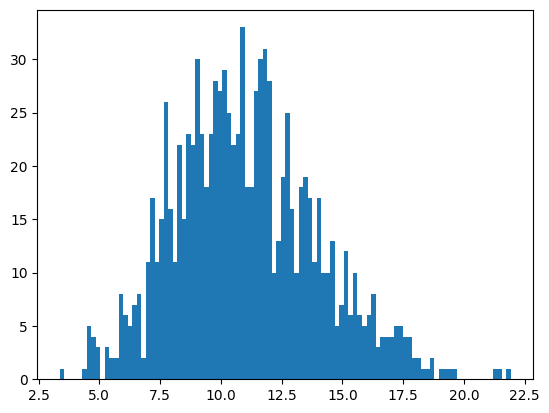

In [32]:
mu, sigma = 11, 3
shape, scale = gamma_params(mu, sigma)
size = 1000
s = np.random.gamma(shape, scale, size)
count, bins, ignored = plt.hist(s, bins = 100)

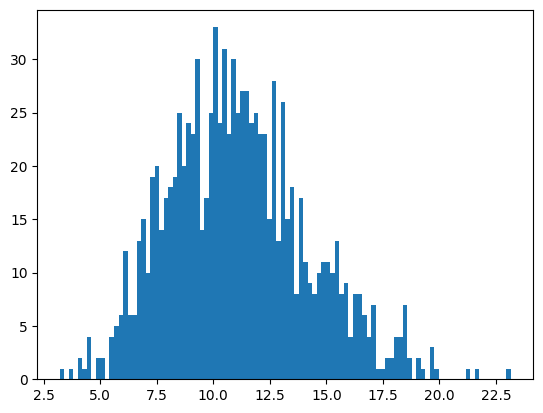

In [34]:
mu, sigma = 11, 3
shape, scale = gamma_params(mu, sigma)
size = 1000
s = sps.gamma(a = shape, scale = scale).rvs(size)
count, bins, ignored = plt.hist(s, bins = 100)
plt.show()

Экспоненциальное 

Экспоненциальное распределение описывает интервалы времени между независимыми событиями, происходящими со средней интенсивностью $\lambda$.  
Количество наступлений такого события за некоторый отрезок времени описывается дискретным распределением Пуассона.   
Экспоненциальное распределение является частным случаем распределения хи-квадрат (для n=2), а следовательно, и гамма-распределения.   
Так-как экспоненциально распределённая величина является величиной хи-квадрат с 2-мя степенями свободы,   
то она может быть интерпретирована как сумма квадратов двух независимых нормально распределенных величин.

Например, ваш блог посещают 500 пользователей в день. Это среднее значение.   
Количество клиентов магазина за час, землетрясений в год, автомобильных аварий в неделю, опечаток на странице и так далее   
— это средние значения событий (λ) в единицу времени,  
являющиеся параметром распределения Пуассона.

Если параметр Пуассона будет равен 0,25. В течение единицы времени (неважно, в минутах, часах или годах) событие происходит в среднем 0,25 раз.   
Переводя в термины времени — пройдет 4 часа, прежде чем событие произойдет, если за единицу времени принят 1 час.

Дискретный вариант экспоненциального распределения — это геометрическое распределение.

**Экспоненциальное распределение** задается плотностью вероятности, имеющий вид:

$$f(x;\lambda) = \lambda e^{-\lambda x}$$

для x >= 0, и равно нулю в остальных случаях.

$\lambda$ - scale параметр

**Экспоненциальное распределение** является аналогом геометрического распределения в непрерывных распределениях. Типичный пример экспоненциального распределения - размер дождевой капли, полученный в ходе множества дождевых бурь. Другой пример - время между запросами к страницам wikipedii. 

Матожиданине равно $\frac{1}{\lambda}$  
Диспресия равна $\frac{1}{\lambda^2}$  

Экспоненциальное распределение — это распределение вероятностей, которое используется для моделирования времени,  
в течение которого должно произойти определённое событие.

Это распределение может быть использовано для ответа на такие вопросы, как:

— Как долго владельцу магазина нужно ждать, пока покупатель войдёт в его магазин?  
— Как долго ноутбук будет продолжать работать, прежде чем сломается?  
— Как долго автомобильный аккумулятор будет продолжать работать, прежде чем он умрёт?  
— Сколько нужно ждать до следующего извержения вулкана в определённом регионе?  

На графике по оси икс время до наступления события.   
1 это еденица измерения по которой считаем лямбду  
Например у нас человек может 10 раз за сутки прийти в магазин,  
тогда ламбда равна 10, а еденица измерения это день  
А бета будет 0.1

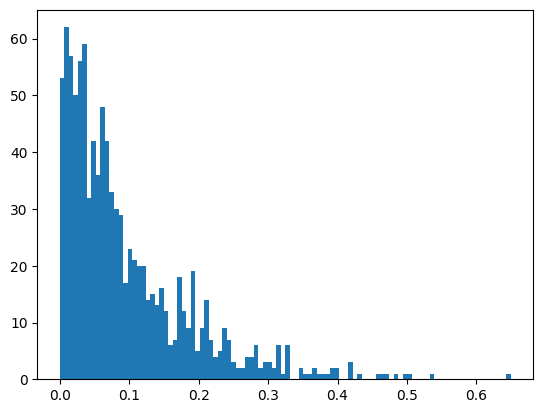

In [22]:
# scale = параметр beta (1 / lambda), size - размер выборки
# beta - среднее вермя между событиями
# lambda - количество событий в еденицу времени
beta, size = 0.1 , 1000 
s = np.random.exponential(scale=beta, size=size)
count, bins, ignored = plt.hist(s, 100)
plt.show()

Если взять больше бинов, то получим приближение плотности вероятности,  
которая при t равном нулю равна ламбда (1 / beta)

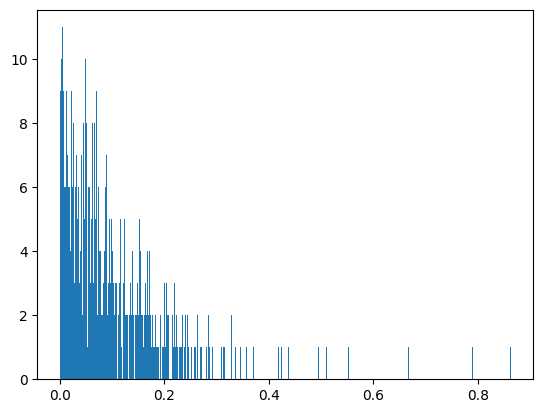

In [34]:
beta, size = 0.1 , 1000 # scale = параметр beta, size - размер выборки
s = sps.expon(scale=beta).rvs(size)
count, bins, ignored = plt.hist(s, 1000)
plt.show()

На следующем графике мы видим вероятность, что событие произойдет через определенные промежутки вермени    
по икс время после предыдущего события, а по игриг вероятность, что событие случиться до этого момента (именно до этого то есть интервал)

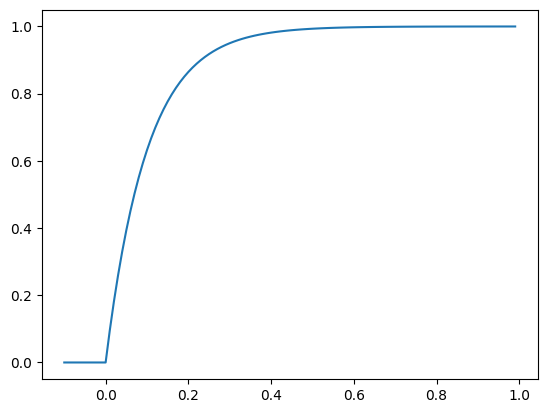

In [29]:
beta, size = 0.1 , 1000 # scale = параметр beta, size - размер выборки
x = np.arange(-0.1, 1, 0.01)
s = [sps.expon(scale=beta).cdf(t) for t in x]
plt.plot(x, s)

Примеры задач на экспоненциальное распределение  

Например, предположим, что среднее количество минут между извержениями определенного гейзера составляет 40 минут.  
Если гейзер только что извергся, какова вероятность того, что нам придется ждать следующего извержения менее 50 минут?

In [8]:
# mu = 1 / lamb
mu = 40
beta = mu
# сколько извержений происходит в еденицу времени (тут еднеица это 1 минута)
lamb = 1 / mu
t = 50
prob = sps.expon(scale=beta).cdf(t)
prob

0.7134952031398099

Например, предположим, что новый покупатель заходит в магазин в среднем каждые две минуты.   
После прихода клиента найти вероятность того, что новый клиент прибудет менее чем за одну минуту.

In [17]:
# mu = 1 / lamb
# среднее время между клиентами составляет две минуты, тогда
mu = 2
beta = mu
# сколько раз клиент зайдет в магазин за еденицу времени (единица времени тут 1 минута)
lamb = 1 / mu
t = 1
prob = sps.expon(scale=beta).cdf(t)
prob

0.3934693402873666

Например, предположим, что землетрясение происходит в среднем каждые 400 дней в определенном регионе.   
После землетрясения найти вероятность того, что следующее землетрясение произойдет не ранее, чем через 500 дней.

In [19]:
# mu = 1 / lamb
# среднее время между землетрясениями 400 дней
mu = 400
beta = mu
# сколько землятресений произойдет за еденицу вермени (1 день)
lamb = 1 / mu
t = 500
prob = sps.expon(scale=beta).cdf(t)
prob

0.7134952031398099

Геометрическое

Геометри́ческое распределе́ние в теории вероятностей — распределение дискретной случайной величины, равной количеству испытаний случайного эксперимента до наблюдения первого «успеха». 
Пусть $X_{1},...X_{n}$ - бесконечная последовательность независимых случайных величин с распределением Бернулли, то есть
$$X_{i} = \left \{ \begin{matrix}
1, & p & \\ 
0, & q=1-p & i = 1,2,.. 
\end{matrix} \right.$$
Построим случайную величину ${\displaystyle Y=\min \left\{i\mid X_{i}=1\right\}-1}$ — количество «неудач» до первого «успеха». Распределение случайной величины Y называется геометрическим с вероятностью «успеха» p, что обозначается следующим образом:  $Y\sim \mathrm {Geom} (p)$.
Функция вероятности случайной величины Y имеет вид:

${\displaystyle \mathbb {P} (Y=n)=q^{n}p,\;n=0,1,2,\ldots } $

$$E = \frac{1}{p}$$
$$D = \frac{q}{p^2}$$

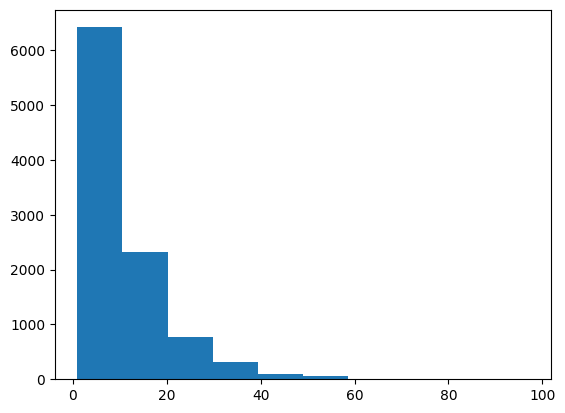

In [17]:
p = 0.1 # p - вероятность успеха
s = sps.geom(p).rvs(size=10000)
count, bins, ignored = plt.hist(s, 10, )
plt.show()

# Про двусторонее, левосторонее и правосторонее p-value <a class="anchor" id="p-value-sides"></a>

Если нам нужно перевести z значение в p-value
- Односторонняя альтернатива  
берем занчение `sf`
- Двусторонняя альтернатива  
берем занчение `2 * sf(abs(z))`

Если нам нужно перевести уровень значимости в z значение 
- Односторонняя альтернатива  
берем занчение `ppf(1 - significance_level)`  
- Двусторонняя альтернатива  
берем занчение `ppf(1 - 0.5 * significance_level)`

### Если нам нужно перевести z значение в p-value

Если мы просто берем z значение и ставим в `cdf` (cumulative distribution function),  
то мы получаем значение отрезка от минус бесконечности до этого значения

In [3]:
z = 1.96
sps.norm.cdf(z)

0.9750021048517795

In [4]:
z = 1.96
sps.norm.sf(z)

0.024997895148220435

Это подходит, когда у нас одностороняя альтернатива (гипотеза H0)  
Если у нас двусторонняя, то нам нужно это значение умножить на 2,  
так как с другой стороны тоже такое же значение  
причем сначала берем модуль, чтобы убрать знак,  
так как у нас с одной строны будет минус и нам нужно взять  обе стороны

In [6]:
z = 1.96
2 * sps.norm.sf(abs(z))

0.04999579029644087

### Если нам нужно перевести уровень значимости в z значение 

Если у нас односторонняя альтернатива, то мы просто используем `ppf(1 - significance_level)`  
Получаем z значение, для которого вероятность от минус бесконечности до z равна `1 - significance_level`

In [9]:
significance_level = 0.05
sps.norm.ppf(1 - significance_level)

1.6448536269514722

Если у нас двусторонняя альтернатива, то мы используем `ppf(1 - 0.5 * significance_level)`

In [10]:
significance_level = 0.05
sps.norm.ppf(1 - 0.5 * significance_level)

1.959963984540054

# Добверительные интервалы <a class="anchor" id="confident-intervals"></a>

Они нужны для того чтобы понимать в пределах какого интервала может варьироваться наша выборочная оценка, так как она случайна и только приближается к истиной оценке распределения.<br>
Интервальная оценка истиного значения theta это числовой интервал (theta1,theta2), который с заданной вероятностью накрывает неизвестное значение параметра theta.
<img src="../img/thera.png" alt="lokh" height="300" width="300">

Важно понимать что границы интервала это случайные величины а истиное значение нет.
Величина доверительного интервала зависит от величины выборки n (чем больше n тем уже интервал), от доверительной вероятности (1-a) (чем больше доверительная вероятность тем шире интервал)

А за счет ЦПТ мы можем строить доверительные интервалы для средних из не сильно скошенных относительно нормального распределения выборок
<img src="../img/x_mean_norm.png" alt="lokh" height="200" width="200">
Одной и той же формулой:
<img src="../img/intervals_formula.png" alt="lokh" height="400" width="500">
Но как вы заметили в этой формуле присутствует DX, которую мы по факту не знаем, для этого мы заменяем ее на лучшую оценку - выборочную дисперсию и тогда используем t статистику из распределения Стьюдента вместо Z статистики. Получаем по итогу вот такую формулу которой будем пользоваться для интервальных оценок средних.

$$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [24]:
import statsmodels.stats.weightstats as stsw
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [49]:
sample = df.satisfaction_level
sample_mean = sample.mean()
# sem = sample.std() / np.sqrt(sample.size)
sem = sample.sem()
confidence = sps.norm(loc=sample_mean, scale=sem).interval(0.95)
confidence


(0.6088545436140534, 0.6168125008555777)

Text(0.5, 1.0, 'Доверительный интервал')

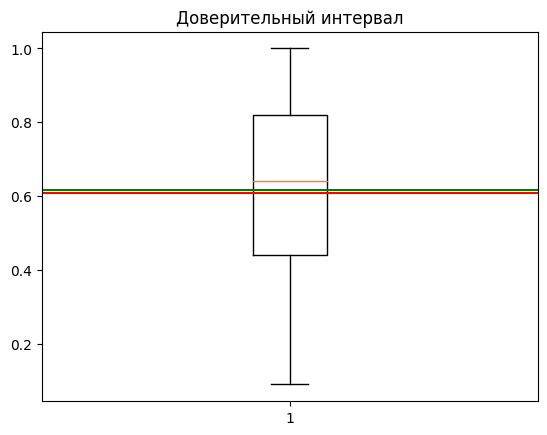

In [52]:
plt.boxplot(df.satisfaction_level)
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

In [22]:
stsw._tconfint_generic(mean=sample_mean, std_mean=sem, dof=sample.size-1, alpha = 0.05, alternative='two-sided')

(0.6088542224780779, 0.6168128219915533)

In [25]:
stsw._zconfint_generic(mean=sample_mean, std_mean=sem, alpha = 0.05, alternative='two-sided')

(0.6088545436140534, 0.6168125008555777)

In [4]:
import statsmodels.stats.api as stm
# stm.DescrStatsW(sample).tconfint_mean(0.05)
stm.DescrStatsW(sample).zconfint_mean(alpha=0.05, alternative='two-sided')


NameError: name 'sample' is not defined

Для двух выборок

In [30]:
stm.zconfint(df.satisfaction_level, df.last_evaluation)

(-0.10809896625684579, -0.09843746950553867)

In [31]:
sample_mean = df.satisfaction_level.mean() - df.last_evaluation.mean() 
# sem = sample.std() / np.sqrt(sample.size)
sem = np.sqrt(df.satisfaction_level.var() / df.satisfaction_level.size + df.last_evaluation.var() / df.last_evaluation.size)
sps.norm(loc=sample_mean, scale=sem).interval(0.95)

(-0.10809896625684579, -0.09843746950553867)

Для долей

In [40]:
import statsmodels.stats.api as stm
count = [70, 80]
nobs = [100, 100]
stm.proportions_ztest(count=count, nobs=nobs)

(-1.6329931618554536, 0.1024704348597491)

In [46]:
# руками можно это посчитать так
# количество элементов у нас 100, так как 70 успехов из 100
p0 = 0.7
p1 = 0.8
(p0 - p1) / np.sqrt(p0 * (1-p0)/100 + p1 * (1-p1)/100)

-1.6439898730535742

In [5]:
stm.proportion_confint(count=60, nobs=100)

(0.5039817664728937, 0.6960182335271062)

In [39]:
count = [70, 80]
nobs = [100, 100]
stm.confint_proportions_2indep(count1=count[0], nobs1=nobs[0], count2=count[1], nobs2=nobs[1], alpha=0.05)

(-0.21673435401778607, 0.02024936215301329)

In [48]:
prop_mean = p0 - p1
prop_sem = np.sqrt(p0 * (1-p0)/100 + p1 * (1-p1)/100)
sps.norm(loc=prop_mean, scale=prop_sem).interval(0.95)

(-0.2192199548589425, 0.019219954858942317)

# Критерий Колмогорова Смирнова (сравнение двух выборок или проверка принадлежности к какому-то распределению) <a class="anchor" id="kolmogorov-smirnov"></a>

Идея критерия Колмогорова — Смирнова — сравнить кумулятивные распределения двух групп.  
В частности, статистика теста Колмогорова — Смирнова представляет собой максимальную абсолютную разницу между двумя кумулятивными распределениями.

Этот тест имеет низкую мощность, если мы сравниваем нашу выборку с эталонной.  
Так как сравнивается с непрерывнм распределением и следовательно точность низкая.   
Поэтому его лучше не использовать для проверки на нормальность.  
А вот для сравнения двух выборок можно.  

$H_0$: распределение имеет нормальный закон.    
$H_1$: распределение имеет какой-то другой закон.  
Важно: $\mathcal{F_0}$ (эталонное распределение) должно быть непрерывным.

По сути значение p value это вероятностЬ, что верна нулевая гипотеза,  
в нашем случае можно говорить, что это вероятнсоть что наше распределение  
имеет форму эталонного.  
Либо, если мы сравниваем 2 распределния, то это вероятнсоть, что эти распределния из одного.  
То есть между ними есть связь. 

In [15]:
X = np.random.normal(180, 2, 100)
n = X.shape[0]

# выборочное среднее
x_mean = np.mean(X)
# несмещённая выборочная дисперсия 
x_var_corr = ((x_mean - X)**2/(n-1)).sum()
# выборочное несмещённое среднеквадратическое отклонение
x_std_corr = np.sqrt(x_var_corr)
print('Параметры распределения a: {a:.2f}, var: {v:.2f}, sigma: {s:.2f}'.format(a=x_mean, v=x_var_corr, s=x_std_corr))

Параметры распределения a: 179.99, var: 4.00, sigma: 2.00


In [16]:
sps.stats.kstest(X, cdf='norm', args=(x_mean, x_std_corr))

KstestResult(statistic=0.049937390046949026, pvalue=0.9536868175307089)

Вaжно в аргументах передавать параметры нашего распределения,  
чтобы сравнивалось не с распределение со стандартными настройками

In [5]:
sps.stats.kstest(X, cdf='norm', args=(x_mean, x_std_corr))

KstestResult(statistic=0.12240497269408301, pvalue=0.8904208418127803)

У нас нет оснований говорить. что наше распределение не отностися к нормальному

In [14]:
sps.stats.kstest(X, cdf='uniform', args=(X.min(), X.max()-X.min()))

KstestResult(statistic=0.1934782608695652, pvalue=0.3920802516420857)

KstestResult(statistic=0.26, pvalue=0.002219935934558366)
Ttest_indResult(statistic=-2.4118942848169462, pvalue=0.016782365922288163)
MannwhitneyuResult(statistic=4173.0, pvalue=0.0434393357201973)


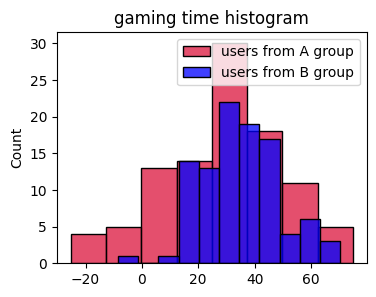

In [28]:
X1 = np.random.normal(30, 21, 100)
Y1 = np.random.normal(35, 15, 100)
sns.histplot(X1, color='crimson', label='users from A group')
sns.histplot(Y1, color='blue', label='users from B group')
plt.title('gaming time histogram')
plt.legend()
plt.gcf().set_size_inches(4, 3)
print(sps.stats.ks_2samp(X1, Y1))
print(sps.ttest_ind(X1, Y1))
print(sps.mannwhitneyu(X1, Y1))

Двувыборочный тест колмогорова смирнова  
можно использовать любую из этих функций

In [14]:
data1 = np.random.randn(100)
data2 = np.random.lognormal(3, 1, 100)
sps.ks_2samp(data1, data2)

KstestResult(statistic=0.97, pvalue=2.9009862944482307e-53)

In [16]:
# если мы знаем, что второе распределение правее первого, то можно указать  
# alternative = less, это значит, что group1 меньше group2
# аналогично для greater
sps.kstest(data1, data2)

KstestResult(statistic=0.97, pvalue=2.9009862944482307e-53)

# Критерии проверки на нормальность <a class="anchor" id="normal-test"></a>

In [2]:
N = 100
X0 = np.random.normal(28, 21, N)
sps.stats.normaltest(X0)

NormaltestResult(statistic=0.014688369613427772, pvalue=0.9926827178189517)

In [6]:
sps.shapiro(X0)

ShapiroResult(statistic=0.9908958077430725, pvalue=0.7367079854011536)

# Функция для определение вида распределения <a class="anchor" id="func-kind-distr"></a>

Следующий код проверяет на какое распределение похожа выборка из заданных распределений.
Параметр param_bins нужно поставить таким, чтобы его значение было не больше размера выборки. 

https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

Text(0, 0.5, 'Frequency')

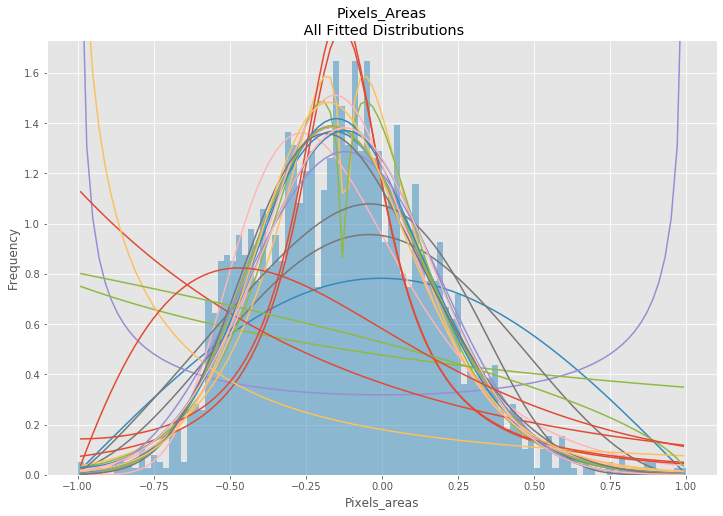

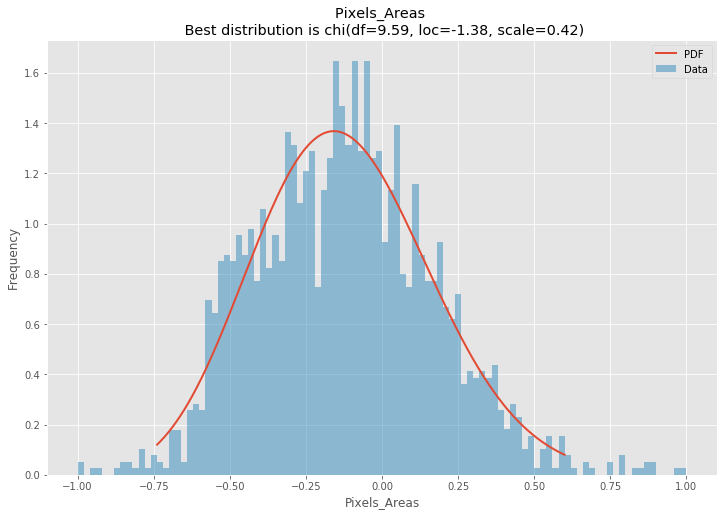

In [ ]:
import scipy.stats as st
import matplotlib
import warnings

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

param_bins = 100

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = df_norm['Empty_Index']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=param_bins, normed=True, alpha=0.5, color=list(plt.rcParams['axes.prop_cycle'])[1]['color'])
            #   plt.rcParams['axes.prop_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, param_bins, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Pixels_Areas\n All Fitted Distributions')
ax.set_xlabel(u'Pixels_areas')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=param_bins, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Pixels_Areas \n Best distribution is ' + dist_str)
ax.set_xlabel(u'Pixels_Areas')
ax.set_ylabel('Frequency')

# Хи квадрат Пирсена <a class="anchor" id="chi2"></a>

Эмпирические значения
|                 | Признак № 2 - 0 | Признак № 2 - 1 | Сумма |
| --------------- | - | - | - |
| Признак № 1 - 0 | a | b | a + b |
| Признак № 2 - 1 | c | d | c + d |
| Сумма | a + c | b + d | n = a + b + c + d |

Ожидаемые значения
|                 | Признак № 2 - 0 | Признак № 2 - 1 | Сумма |
| --------------- | - | - | - |
| Признак № 1 - 0 | $$ \frac{(a + c)  (a + b)}{n}$$ | $$ \frac{(b + d)  (a + b)}{n}$$ | a + b |
| Признак № 1 - 1 | $$ \frac{(a + c)  (c + d)}{n}$$ | $$ \frac{(b + d)  (c + d)}{n}$$ | c + d |
| Сумма | a + c | b + d | n = a + b + c + d |

df = (n - 1) * (m - 1)  
где n - количество столбцов таблицы, m - количество строк

χ² = ∑( (fO - fE)² ) / fE

H0: Распределение частот не отличимо от ожидаемого (Две переменные независимы.)  
H1: Распределение частот отличимо от ожидаемого, иными словами: номинативные переменные взаимосвязаны между собой (Есть взяимосвязь между признаками)  
Задача: Исследование наличия взаимосвязи между двумя номинативными переменными     

Допустим у нас есть табличка, в которой 2 категориальных признака
Первый признак это вид животного, а второй признак это категория людей, которая выбрала животное
| Вид животного | Категория человека |
| - | - |
| собака | ребенок  |
| кошка | взрослый |
| кошка | ребенок  |
| птица | пенсионер |
| собака | взрослый |
| собака | ребенок |
| ... | ... |
| кошка | взрослый |

Теперь мы создаем табличку сопряженности  
по строкам значения одного признака,    
по столбцам значения другого признака,   
и в ячейках сколько соответствующих пар

| | собака | кошка | птица | всего |
| - | - | - | - | - |
| ребенок | 207 | 282 | 241 | 730 |
| взрослый | 234 | 242 | 232 | 708 |
| пенсионер | 194 | 224 | 321 | 739 |
| всего | 635 | 748 | 794 | 2177 |

In [20]:
# например у нас есть 3 группы (номер группы это будет признак 1) и пусть это строки
# столбцы это какие-то значения второго признака
observed = np.array(
    [[207, 282, 241],
     [234, 242, 232],
     [194, 224, 321]])
sps.chi2_contingency(observed)

(28.27162419750234,
 1.0987541689287958e-05,
 4,
 array([[212.93063849, 250.82223243, 266.24712908],
        [206.51355076, 243.26320625, 258.22324299],
        [215.55581075, 253.91456132, 269.52962793]]))

Если p-value ниже выбранного уровня значимости, то  
есть основания отвергнуть нулевую гипотезу, что между признаками нет связи.  
Делаем вывод, что возможно связь есть.

У нас есть ожидаемые и наблюдаемые частоты и мы хотим их сравнить,  
то есть по сути мы хотим сравнить распределения и понять из одного ли они распределения  
тогда мы можем использовать критерий согласия хи квадрат

Мы вышли на улицу в городе.  
Стали считать встречающихся мужчин и женщин до 1000. При этом нам встретилось 589 женщин и 411 мужчин.  
Можем ли мы сказать, что количество мужчин и женщин в городе одинаково?  
$H_0$: количество мужчин и женщин строго одинаково; вероятность того, что случайный встреченный человек является мужчиной = 0.5    
$H_1$: вероятности не равны.  

In [35]:

N = 1000
females = 589
males = N - females
observed = [females, males]
expected = [N/2, N/2]
sps.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=31.684, pvalue=1.8141062046967342e-08)

У нас есть основания отвергнуть нулевую гипотезу о равнестве количества. 

# Точный критерий фишера <a class="anchor" id="fisher-exact"></a>

|  | демократ | республиканец | 
| - | - | - | 
| женский | 8 | 4 | 
| Мужской | 4 | 9 |

Точный тест Фишера использует следующие нулевые и альтернативные гипотезы:

H 0 : (нулевая гипотеза) Две переменные независимы.  
H 1 : (альтернативная гипотеза) Две переменные не являются независимыми.  

In [19]:
observed = np.array(
    [[8, 4],
     [4, 9]])
# если мы знаем, что второе распределение правее первого, то можно указать  
# alternative = less, это значит, что group1 меньше group2
# аналогично для greater
sps.fisher_exact(observed)

(4.5, 0.1152385439301579)

Если бы мы выбрали уровень значимости, например 1 процент, то  
мы получили p-value выше уровня значимости

Таким образом, у нас нет достаточных доказательств, чтобы сказать,  
что существует значительная связь между полом и предпочтениями политических партий.

# Коэффициент корреляции Пирсона <a class="anchor" id="pearson"></a>

p-value измеряет вероятность того, что корреляция между переменными возникла случайно, а не из-за реальной зависимости между ними.  
Если p-value меньше заданного уровня значимости (обычно 0.05), то мы отвергаем нулевую гипотезу, которая утверждает, что корреляция между переменными равна нулю. Это означает, что мы считаем, что наблюдаемая корреляция является статистически значимой и не является случайной.

In [30]:
var1 = np.random.randint(1, 100, 100)
var2 = np.random.randint(1, 100, 100)
sps.pearsonr(var1, var2)

(0.014787798136307807, 0.8839002654455972)


# Коэффициент корреляции Спирмена / Кендалла <a class="anchor" id="spearman-kendaal"></a>

p-value измеряет вероятность того, что корреляция между переменными возникла случайно, а не из-за реальной зависимости между ними.  
Если p-value меньше заданного уровня значимости (обычно 0.05), то мы отвергаем нулевую гипотезу, которая утверждает, что корреляция между переменными равна нулю. Это означает, что мы считаем, что наблюдаемая корреляция является статистически значимой и не является случайной.

In [ ]:

print(sps.spearmanr(var1, var2))

KendalltauResult(correlation=-0.07255277772212843, pvalue=0.29008768062541634)
SpearmanrResult(correlation=-0.1210117292529215, pvalue=0.23040499605706288)


Кендалл может работать с порядковыми перменными
Если переменные порядковые категориальные переменные, то нужно передавать ранки (то есть нужно перевести в ранки)  
Можно использовать словарь, например,  

In [ ]:

# Создаем пример данных
data = {'Level of Satisfaction': ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied'],
        'Level of Recommendation': ['Highly Recommended', 'Recommended', 'Not Recommended', 'Not at All Recommended', 'Not at All Recommended']}

df = pd.DataFrame(data)

# Определяем ранги для категориальных переменных
satisfaction_rank = {'Very Satisfied': 5, 'Satisfied': 4, 'Neutral': 3, 'Dissatisfied': 2, 'Very Dissatisfied': 1}
recommendation_rank = {'Highly Recommended': 5, 'Recommended': 4, 'Not Recommended': 3, 'Not at All Recommended': 2}

# Вычисляем Кенделл (Kendall's tau)
tau, p_value = kendalltau(df['Level of Satisfaction'].map(satisfaction_rank), df['Level of Recommendation'].map(recommendation_rank))


# Т критерий стьюдента и Уэлча <a class="anchor" id="t-student"></a>

In [ ]:
from termcolor import colored

a = np.random.normal(25, 15, 1000)
b = np.random.normal(28, 15.6, 1000)

alpha = 0.05
results = sps.ttest_ind(a, b, equal_var=False)

# Проверка гипотез о равенстве средних
if (results.pvalue < alpha):
    print(colored("Отвергаем нулевую гипотезу", 'red'), f'pvalue: {results.pvalue}', f'alpha: {alpha}')
    print()
else:
    print(colored("Не можем отвергнуть нулевую гипотезу", 'green') , f'pvalue: {results.pvalue}', f'alpha: {alpha}')
    print()

In [10]:
#create pandas DataFrame
df = pd.DataFrame({'method': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
 'score': [71, 72, 72, 75, 78, 81, 82, 83, 89, 91, 80, 81, 81,
 84, 88, 88, 89, 90, 90, 91]})

#view first five rows of DataFrame
df.head ()

,method,score
0,A,71
1,A,72
2,A,72
3,A,75
4,A,78


In [ ]:
sns.histplot(df[df['method']=='A'])
sns.histplot(df[df['method']=='B'])

In [12]:
#define samples
group1 = df[df['method']=='A']
group2 = df[df['method']=='B']

#perform independent two sample t-test
# если мы знаем, что второе распределение правее первого, то можно указать  
# alternative = less, это значит, что group1 меньше group2
# аналогично для greater
sps.ttest_ind(group1['score'], group2['score'], alternative='less', equal_var=False)

Ttest_indResult(statistic=-2.6034304605397938, pvalue=0.008984642297405213)

Для долей

In [6]:
# count - это успехи
# nobs - это сколько всего наблюдейний
# в данном случае у нас 2 выборки
# у перой 70 верно из 100, то есть p = 0.7
# у второй 80 верно из 100, то есть p = 0.8
import statsmodels.stats.api as stm
count = [70, 80]
nobs = [100, 100]
stm.proportions_ztest(count=count, nobs=nobs, alternative='smaller')

(-1.6329931618554536, 0.05123521742987455)

Через формулу

In [2]:
def two_sample_binomial_test(p1, N1, p2, N2, alternative = 'two-sided'):
    '''
    alternative: str in ['two-sided', 'smaller', 'larger']
    '''
    p = (N1*p1+N2*p2)/(N1+N2)
    Z = np.sqrt(N1 * N2 / (N1 + N2)) * (p1 - p2) / np.sqrt(p * (1 - p))
    if alternative == 'two-sided':
        p_value = 2 * sps.norm.sf(abs(Z))
    else:
        p_value = sps.norm.sf(abs(Z))       
    return Z, p_value

In [5]:
count = [70, 80]
nobs = [100, 100]
p1 = count[0] / nobs[0]
p2 = count[1] / nobs[1]
N1 = nobs[0]
N2 = nobs[1]
two_sample_binomial_test(p1, N1, p2, N2, alternative='smaller')

(-1.6329931618554536, 0.05123521742987455)

In [37]:
stm.test_proportions_2indep(count1=count[0], nobs1=nobs[0], count2=count[1], nobs2=nobs[1])

<class 'statsmodels.stats.base.HolderTuple'>
statistic = -1.6168005690124538
pvalue = 0.1059213365668442
compare = 'diff'
method = 'agresti-caffo'
diff = -0.10000000000000009
ratio = 0.8749999999999999
odds_ratio = 0.583333333333333
variance = 0.003676941749402568
alternative = 'two-sided'
value = 0
tuple = (-1.6168005690124538, 0.1059213365668442)

Стьюдент-критерий Уэлча аналогичен независимому t-тесту для двух выборок, за исключением того, что он не предполагает,  
что две совокупности, из которых взяты выборки, имеют одинаковую дисперсию .

Чтобы выполнить t-критерий Уэлча для того же набора данных, что и в предыдущем примере,  
нам просто нужно указать equal_var=False в функции ttest_ind () следующим образом:

In [33]:
sps.ttest_ind(group1['score'], group2['score'], equal_var=False)

Ttest_indResult(statistic=-2.603430460539794, pvalue=0.02014688617423973)

# U критерий Манна Уитни <a class="anchor" id="manna-uitni"></a>

Манна Уитни не любит, когда данные повторяются в выборках, тогда он может врать

Способ расчета следующий 
- объединяем две выборки в одну и даем ранки (важно если у нас идут подряд числа, то ранк будет равен среднему порядковому ранку, то есть елси у нас  
7, 8, 9, 10 элементы это 3, то мы считаем средний ранк получим 8.5 и пишем 8.5, 8.5, 8.5, 8.5)   
- Далее суммируем ранки и считаем по формуле   
Из этого видно, что тест не любиТ. когда числа в разных распределениях разные,  
например если у нас распределение от -1 до 1 и второе от -100 до 100, то могут быть проблемы,  
так как одно войдет внутрь другого при упорядочивании

Также Манна Уитни не любит, когда у нас разные формы у выборок.   
Если тестируемая фича полностью сдвигает выборку на некий коэффициент theta или масштабирует выборку на некий параметр theta (theta > 0),  
то критерий Манна-Уитни применим, и он будет верно оценивать направление сдвига математического ожидания.  

$T_{new} = T_{old} + \theta$  
$T_{new} = T_{old} * \theta$

In [8]:
group1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
group2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]
# если мы знаем, что второе распределение правее первого, то можно указать  
# alternative = less, это значит, что group1 меньше group2
# аналогично для greater
sps.mannwhitneyu(group1, group2, alternative='less')

MannwhitneyuResult(statistic=50.0, pvalue=0.10569472950629227)

# ANOVA <a class="anchor" id="anova"></a>

ANOVA уже учитывает множественное тестирование в своей структуре.  
Поэтому поправка Бонферрони не нужна. 

если у нас только один фактор, то есть есть разные группы,  
и у всех измеряется один признак, то мы используем однофакторный дисперсионный анализ

H 0 (нулевая гипотеза): µ 1 = µ 2 = µ 3 = … = µ k (все средние значения совокупности равны)  
H 1 (нулевая гипотеза): по крайней мере одно среднее значение популяции отличаетсяот остальных

In [44]:
column1 = pd.Series(np.random.normal(25, 15.1, 1000))
column2 = pd.Series(np.random.normal(24, 15, 1000))
column3 = pd.Series(np.random.normal(28, 15.2, 1000))
if column1.isna().sum() or column2.isna().sum() or column2.isna().sum():
    raise Exception(f'column1 and column2 must not have missing values.\ncolumn1 have {column1.isna().sum()} missing values\ncolumn2 have {column2.isna().sum()} missing values')

alpha = 0.05
statistic, p_value = stats.f_oneway(column1, column2, column3)

print('тест ANOVA')
print('alpha = ', alpha)
print('p-value = ', p_value)
if p_value < alpha:
    print(colored("Отклоняем нулевую гипотезу, поскольку p-value меньше уровня значимости", 'red'))
else:
    print(colored("Нет оснований отвергнуть нулевую гипотезу, поскольку p-value больше или равно уровню значимости", 'green'))   

F_onewayResult(statistic=2.3575322551335636, pvalue=0.11384795345837218)

У нас нет достаточных доказательств того, что между тремя методами обучения есть разница в экзаменационных баллах.

Тест Тьюки
Тест Тьюки - это метод множественных сравнений, который используется для определения,  
какие конкретно группы различаются между собой, после того как ANOVA показала статистически значимую разницу между группами.
endog: Это массив данных, который содержит все значения, которые будут использоваться для сравнения.  
Это должен быть одномерный массив, содержащий все значения из всех групп.
groups: Это массив, который содержит информацию о принадлежности каждого значения к определенной группе.
Это должен быть одномерный массив, содержащий строковые значения, которые соответствуют каждому значению в endog.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
data = np.concatenate((column1, column2, column3))
groups = np.repeat(['A', 'B', 'C'], [column1.size, column2.size, column3.size])
tukey = pairwise_tukeyhsd(endog=data, groups=groups, alpha=0.05)
print("Тест Тьюки:")
print(tukey)

Двуфакторный анализ

Ботаник хочет знать, влияет ли на рост растений воздействие солнечного света и частота полива.   
Она сажает 30 семян и позволяет им расти в течение двух месяцев при различных условиях солнечного света и частоты полива.   
Через два месяца она записывает высоту каждого растения в дюймах.

In [45]:
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
    'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
    'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
    6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
 4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})
df.head()

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6


In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


Мы можем видеть следующие p-значения для каждого из факторов в таблице:  

вода: p-значение = 0,000527  
солнце: p-значение = 0,0000002  
вода * солнце: p-значение = 0,120667  
Поскольку p-значения для воды и солнца меньше 0,05, это означает, что оба фактора оказывают статистически значимое влияние на высоту растений.  

А поскольку p-значение для эффекта взаимодействия (0,120667) составляет не менее 0,05, это говорит нам об отсутствии значительного эффекта взаимодействия между   воздействием солнечного света и частотой полива.

# Критерий Краскела-Уоллиса (H-критерий) <a class="anchor" id="kruskal"></a>

Исследователи хотят знать, приводят ли три разных удобрения к разным уровням роста растений.  
Они случайным образом выбирают 30 разных растений и делят их на три группы по 10 штук, применяя к каждой группе разные удобрения.  
В конце месяца измеряют высоту каждого растения.

Тест Крускала-Уоллиса использует следующие нулевые и альтернативные гипотезы:

Нулевая гипотеза (H 0 ): Медиана одинакова для всех групп.

Альтернативная гипотеза: (Ha): Медиана не одинакова для всех групп.

In [ ]:
group1 = [7, 14, 14, 13, 12, 9, 6, 14, 12, 8]
group2 = [15, 17, 13, 15, 15, 13, 9, 12, 10, 8]
group3 = [6, 8, 8, 9, 5, 14, 13, 8, 10, 9]

In [48]:
sps.kruskal(group1, group2, group3)

KruskalResult(statistic=4.261237712243081, pvalue=0.11876377341727391)

Поскольку это p-значение меньше 0,05, мы можем отвергнуть нулевую гипотезу о том, что средний рост растений одинаков для всех трех удобрений.   
У нас есть достаточно доказательств, чтобы заключить, что тип используемого удобрения приводит к статистически значимым различиям в росте растений.

# Тест Тьюки <a class="anchor" id="pairwise-tukeyhsd"></a>

Тест Тьюки основан на ранжировании данных и использует методы ранжирования для сравнения групп.   
Это означает, что тест Тьюки может быть использован для данных, которые не удовлетворяют предположению нормальности.

тест Тьюки может быть чувствителен к гетероскедастичности (неравномерной дисперсии) данных. 

Тест Тьюки - это метод множественных сравнений, который используется для определения,  
какие конкретно группы различаются между собой, после того как ANOVA показала статистически значимую разницу между группами.

pairwise_tukeyhsd - это функция, которая выполняет попарное сравнение групп с помощью метода Тьюки.   
Он также проверяет гипотезу о равенстве средних значений групп, но он учитывает множественное тестирование  
и корректирует уровень значимости для каждого сравнения.

endog: Это массив данных, который содержит все значения, которые будут использоваться для сравнения.  
Это должен быть одномерный массив, содержащий все значения из всех групп.

groups: Это массив, который содержит информацию о принадлежности каждого значения к определенной группе.
Это должен быть одномерный массив, содержащий строковые значения, которые соответствуют каждому значению в endog.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
data = np.concatenate((column1, column2, column3))
groups = np.repeat(['A', 'B', 'C'], [column1.size, column2.size, column3.size])
tukey = pairwise_tukeyhsd(endog=data, groups=groups, alpha=0.05)
print("Тест Тьюки:")
print(tukey)

Тест Тьюки:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B  -1.5336 0.0612 -3.1225 0.0553  False
     A      C   2.8943 0.0001  1.3054 4.4832   True
     B      C   4.4279    0.0   2.839 6.0168   True
---------------------------------------------------
